Calvin Lee


**Abstract**:

In this project, we simulated the paths that a one dimensional quantum harmonic oscillator takes in an imaginary time space under different tempeartures, using the Metropolis-Hasting algrithm. Using the paths of the oscillator when the system is in equilibrium at some temperature, we were able to calculte its average internal energy $ \langle H \rangle $ and plot it against the inverse temperature $ \beta $. Our simulation results show that the average internal energy of the system decreases as the inverse temperature increases, and approaches to $ \frac{1}{2} m \omega^2$ for large $ \beta $. This trend agrees with the theoretical prediction. However, we observed a large degree of unstability in the simulation performance for high temperatures. For high temperatures (small $ \beta $), the fluctuation is generally very large and it takes a large amount of iterations to bring the system to equilibrium. We believe that better accuracy (higher stability) in simulations can be achieved in high temperature region by cooling down the system more gradually and increasing the number of iterations, with CPU performance as a trade off.

**Physical System and Model**:

For a one dimensional quantum harmonic oscillator in contact with a heat bath, the average internal energy can be determined by the partition function associated with it, with the form 
\begin{align}
    \langle \hat H\rangle = \sum_{n=0}^\infty p_n E_n = -\frac{1}{Z}\frac{\partial Z}{\partial \beta}.
\end{align} 
The partition function can be computed through a Feynman path integral of in an imaginary time space, which is discretized by many small time intervals. If we evaluate the path integral, we will find that it is essentially some pre-factor times an exponential of classical action $ e^{-U(\vec q)} $, $ \vec q $ being the space vector [1]. Thus, we know that the unnormalized probability distribution follows an exponential function. As long as we find the value of the classical action corresponding to that particular path, we can get its unnormalized probability. By dividing $ e^{-U(\vec q)} $ of one path by another, we get their probability ratio $ \frac {e^{-U(\vec q\prime)}}{e^{-U(\vec q)}} $, which is essentially all we need for the Metropolis-Hasting algorithm to “bring” the system to equilibrium by sampling with some specific probability distribution.

Finally, we compare our simulation result with the theoretical predictions, which can be done by directly summing up all the terms in 
\begin{align}
    \langle \hat H\rangle = \sum_{n=0}^\infty p_n E_n = -\frac{1}{Z}\frac{\partial Z}{\partial \beta}.
\end{align} 

By definition, the partition function is given by $ Z = \sum e^{-\beta E_n} $. We have learned in Quantum that the energy of a one dimensional harmonic oscillator is $ E_n = (\frac{1}{2} + n) m \omega^2$. Plugging this in to our definition of the partition function, we get  $ Z = \sum_{n = 0}^\infty e^{-\beta (\frac{1}{2} + n) m \omega^2} $, which is essentially $ Z = e^{-\frac{1}{2} m \omega^2 \beta} \sum_{n = 0}^\infty e^{-n m \omega^2 \beta} $.

We know that for small $x$, $ 1 + x^2 + x^3 + ... = \frac {1}{1 - x} $. Using this property, we can rewrite our partition function as $ Z = e^{-\frac{1}{2} m \omega^2 \beta} \frac {1}{1 - e^{-m \omega^2 \beta}}$.

Plugging our expression for the partition function into the expression for average internal energy, we get 
\begin{align}
    \langle \hat H\rangle = -\frac{1}{Z}\frac{\partial Z}{\partial \beta} = \hbar \omega (\frac{1}{2} + \frac{1}{e^{\beta \hbar \omega} - 1}),
\end{align} 
from which we can see that the average internal energy goes to $ \frac{1}{2} \hbar \omega $ for large $\beta$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# global constants
m = 1 # mass of the harmonic oscillator
hbar = 1 # set to 1
w = 1

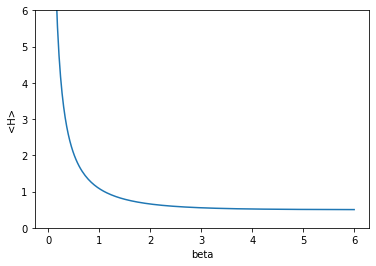

In [ ]:
# Analytic solution

betaAnalytic = np.linspace(0,6,200)
H_avg_exact = hbar * w * 0.5 / np.tanh(betaAnalytic[1:] * hbar * w * 0.5)

plt.plot(betaAnalytic[1:], H_avg_exact)
plt.ylim(0, 6)
plt.xlabel('beta')
plt.ylabel('<H>');

**Algorithms**:

The two main algorithms we used in this project was the Metropolis algorithm to produce a sample of observations to form a Markov Chain and then using a running average to show that these observations will converge to a particular value given enough Monte Carlo Markov Chain iterations.

For the Metropolis algorithm, a sample of observations is produced by first initializing the system into a random starting state; Here our 'state' in cosideration is a imaginary time-path of a particle. We suggest pertubations of this path by dividing the path in N time intervals and from here we implement the Metropolis algorithm as follows [3]:
* Propose another point for the current time interval that's within a specified range $\alpha$ that we specified. 
* Calculate the ratio of probabilites of proposed point to the current point. 
* Despite the fact that this is an unnormalized probability distribution, the Metropolis algorithim only needs the ratio of probabilities. 
* Once we have this ratio, we can compare it to 1, and take the minimum of the two. This will determine the probability we accept or reject the proposal. 
* We then use the numpy library to generate a random value from 0 to 1, if this value is less than the value received from the previous step we accept the proposal and now our state is perturbed for that time interval. 
* These steps will be repeated for as many time intervals the path is divided into, once every interval has been considered, we consider that to be 1 Monte Carlo Markov chain iteration. We will then repeat this overall process as many times as we feel is needed to bring the system into equilibrium. 

Because we do not want to calculate the running average for the Hamiltonian for every single MCMC itration (as that would be computationally expensive), we decided to do so during the final 4000 iterations. Every 100 of the final 4000 iterations we calculate the running average of the Hamiltonian using the following relation:

\begin{align}
    \langle O\rangle_{k+1} = \langle O\rangle_k + \frac{1}{k+1}(o_{k+1} - \langle O\rangle_k).
\end{align}

This more efficient as the system is closer to equilibrium after many MCMC iterations. (Which we specified; the paper by A. Larsen and F.Ravndal [2] mentions that for higher beta it takes less MCMC iterations than lower betas. The actual values were experimentally determined.) 

Afterwards, once the expectation energy function using the MCMC algorithim has been ran, the function not only returns the average Hamiltonian value, but it also returns the time imaginary path of the particle which we take to be the equlibrium state.

Unlike the analytical method where we directly sum up the states of the partition function, with this algorithm we never actually calculate the Hamiltonian by solving for the partition function. Instead we mimic a similar behaviour of the partition function which essentially acts as a weighted sum of basis states with an appropriate weight for each one. Because the Metropolis-Hastings algorithm (given enought iterations) will produce a Markov-Chain in which the occurance of certain state will be proportional to their probability ratios compared to other states. In this case we are considering the paths that the particle can be measured along, and the ratio of boltzmann factors $\frac{e^{-U(\vec q_p)}}{e^{-U(\vec q_c)}}$ are the weights. 

The value of N is chosen according to the recommendation of the paper.

**Code**

In [ ]:
#Test Version
def avg_H(beta, N, q, iterations, H_check = 'Yes'):
  """ Computes the ensemble average energy for a 1D QHO

  Args:
      beta: An array consists of a set of inverse temperature.
      N: An integer specifying the number of time intervals.
      q: An array that represents the initial configuration to start with.
      iterations: An integer that sets number of times the MCMC iterations to be performed on the path.
  
  Returns:
        t: An array of imaginary time intervals divided into N-1 segments.
        phi_avg_arr: An array of the average hamiltonian corresponding to each inverse temperature elements in beta.
        q: An array representing a stable path configuration given by the last iteration.

  """

  width = .4

  # initial config
  t = np.linspace(0, N, N) # length N. N-1 segments

  # coefficients and constants
  U_c1 = m * (N - 1) / (2 * beta * hbar ** 2) # the first coeff in U(q) (array)
  U_c2 = beta / (N - 1) # the second coeff in U(q) (array)
  phi_c = 0.5 * m * w ** 2

  # Initialization to keep track of the average energy
  phi_avg = 0
  thresCount = 1

  #Repeat the MCMC for N iterations
  for n in range(iterations):

    for i in range(1, N):

      q_original = q[i]
      
      for j in range(5):

        # propose a change in q[i]
        q_propose = np.random.uniform(low = q[i] - width, high = q[i] + width)

        # decide whether to accept or not
        U_proposed = U_c1*((q_propose - q[i - 1]) ** 2 + (q[(i + 1) % (N - 1)] - q_propose)**2) + U_c2 * phi_c * q_propose**2
        U_original = U_c1*((q_original - q[i - 1]) ** 2 + (q[(i + 1) % (N - 1)] - q_original)**2) + U_c2 * phi_c * q_original**2
        
        prob_ratio = np.exp(-U_proposed + U_original)

        if np.random.uniform(0,1) < min(1, prob_ratio):
          q[i] = q_propose
    
    q[0] = q[-1]
          
    if n > iterations - 4000 and H_check == 'Yes':
      if n % 100 == 0:
        phi_avg = phi_avg + (1/thresCount) * ((1 / (N - 1)) * 2 * phi_c * np.sum(np.square(q[:-1])) - phi_avg)
        thresCount += 1
  print(phi_avg)
  return t, phi_avg, q

**Results**:

From the plots, we can see that for large betas (low temperatures), the MCMC algorithim produces a result that is similar and in agreement with the analytical method. From the tests below we can see that we took used a sine graph as our initialized state and at compared to the High temperatures, there were fewer iterations needed for the system to reach equilibrium. However, as we continue to pass in lower beta values, we needed to adjust the number of MCMC iterations. There is some tradeoff to be made at this point where in order for us to improve the accuracy of the expected Hamiltonian value we need to run more MCMC iterations. However, this became computationally expensive and did not scale efficiently. Due to the limits of our computers and time constraints there is the possibility that at low beta values (around $\beta = 1$) our system was not at equilibrium before transitioning to the next beta. This may have produced additional error each time this was done. Because at high temperatures, the path undergoes large flucuation about $q =0$, in order to compensate for this, the number of iterations and intervals the path is divided would have to be significantly large. Due to how long it would take to compute that we scaled down the number of iterations and path time intervals. However we are confident that although the relaxation time for the system increases for high temperatures, if given enough iterations the expactation $<H>$ will converge to the value given by the analytical expression : $ \hbar \omega (\frac{1}{2} + \frac{1}{e^{\beta \hbar \omega} - 1}). $

0.6362225436471666
0.5183945897146189
1.467516621319359
1.4295881374674684
[0.63622254 0.51839459 1.46751662 1.42958814]


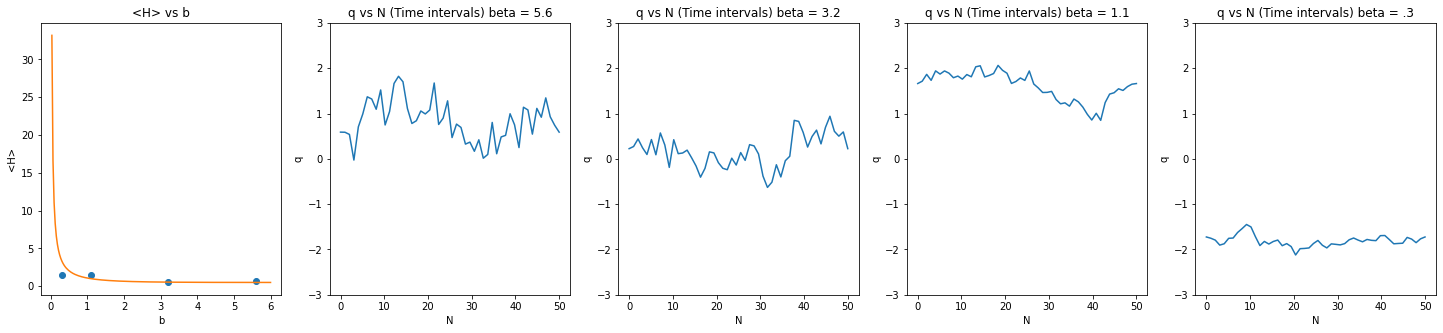

In [ ]:
beta = np.array([5.6, 3.2, 1.1, .3])
N = 50 # number of intervals that beta is divided into
fig = plt.figure(figsize=(25, 5))
ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

ax1.set_title("<H> vs b")
ax1.set_ylabel("<H>")
ax1.set_xlabel("b")

t1, phi_avg1, q_final1 = avg_H(beta[0], N, np.sin(np.linspace(0, 2*np.pi , N)), 30000)
ax2.set_title("q vs N (Time intervals) beta = 5.6")
ax2.set_ylabel("q")
ax2.set_xlabel("N")
ax2.set_ylim(-3, 3)
ax2.plot(t1, q_final1)


t2, phi_avg2, q_final2 = avg_H(beta[1], N, q_final1, 40000)
ax3.set_title("q vs N (Time intervals) beta = 3.2")
ax3.set_ylabel("q")
ax3.set_xlabel("N")
ax3.set_ylim(-3, 3)
ax3.plot(t2, q_final2)

t3, phi_avg3, q_final3 = avg_H(beta[2], N, q_final2, 60000)
ax4.set_title("q vs N (Time intervals) beta = 1.1")
ax4.set_ylabel("q")
ax4.set_xlabel("N")
ax4.set_ylim(-3, 3)
ax4.plot(t3, q_final3)

t4, phi_avg4, q_final4 = avg_H(beta[3], N, q_final3, 80000)
ax5.set_title("q vs N (Time intervals) beta = .3")
ax5.set_ylabel("q")
ax5.set_xlabel("N")
ax5.set_ylim(-3, 3)
ax5.plot(t4, q_final4)

phi_avg_arr = np.array([phi_avg1, phi_avg2, phi_avg3, phi_avg4])

print(phi_avg_arr)
ax1.plot(beta, phi_avg_arr, 'o')
ax1.plot(betaAnalytic[1:], H_avg_exact)

In [ ]:


ax2.set_title("q vs N (Time intervals) beta = 3.2")





ax4.plot(t3, q_final3)


**References** 

https://colab.research.google.com/drive/1PO9cOp0j8oZ25cgzi8uafNVOYnK-rnjr#scrollTo=S-kySxGL8Kqi&forceEdit=true&sandboxMode=true

https://aapt.scitation.org/doi/pdf/10.1119/1.18896?class=pdf

https://aapt.scitation.org/doi/pdf/10.1119/1.18896?class=pdf

